<a href="https://colab.research.google.com/github/CoderAPS/RSNA2023_ATD/blob/main/RSNA2023_ATD_v2_20231003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
#@title change directory
%cd /gdrive/MyDrive/DATA/RSNA2023_ATD

/gdrive/MyDrive/DATA/RSNA2023_ATD


In [4]:
!ls /gdrive/MyDrive/DATA/RSNA2023_ATD/

bwl_extrav.zip		model_check_points	 train_images_bwl_extrav
image_level_labels.csv	model_history		 train_images_bwl_extrav_v2
image_level_labels.zip	train_bwl_extrav_v2.csv  train_images_bwl_extrav_v2.zip
kaggle			train.csv		 train.zip


In [ ]:
import glob
png_paths = glob.glob('/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images_bwl_extrav_v2/**/*.png',
                  recursive=True)
len(png_paths)

11340

In [ ]:
#@title file upload
#from google.colab import files
#files.upload()

In [ ]:
!unzip -q train_images_v3.zip

replace kaggle/working/train_images_v3/13241/33607/101.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#!ls kaggle/input/rsna-2023-abdominal-trauma-detection
!ls /gdrive/MyDrive/DATA/RSNA2023_ATD/train_images_bwl_extrav_v2

10004  13719  18697  26074  31636  37429  43	 49255	54062  57563  64194
10065  13741  18779  263    31749  37495  43059  49403	54183  57612  64256
10217  14018  18877  26324  31781  37802  4331	 49545	5429   57887  64501
10292  14102  19139  26468  32011  37942  43399  49667	54361  58236  65456
10494  14321  19247  26575  32081  38045  4353	 50021	54371  58324  6962
10917  14788  19249  27037  32272  38129  43551  50486	54519  58465  7026
10929  15117  19366  27196  32379  38336  43995  50820	54525  58789  7084
11044  15188  19742  27421  32442  38343  44074  50833	54841  5880   7411
11335  15419  19763  27555  32541  38427  44507  50873	54938  58863  7482
11379  15472  19914  27701  33	   38541  44693  51476	54997  5914   7642
11474  15876  20951  27922  33251  38982  44861  51520	55592  60744  7944
11652  16327  21325  28433  33848  39093  45303  51716	55735  60993  820
11925  16436  2209   28555  3401   40740  45797  51775	55888  61399  8263
12008  16494  22623  28925  34140  40754 

In [ ]:
#====================================================================================================================

In [5]:
!pip install -q keras-cv-attention-models==1.3.20
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.8/748.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 112.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf,math
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import StratifiedGroupKFold
from skimage.color import gray2rgb #convert gray image array to rgb image array
from scipy.ndimage import zoom  # resizing an numpy (image) array
import tensorflow.keras.backend as K
import keras_cv_attention_models
from keras_cv_attention_models import efficientnet

%matplotlib inline

In [7]:
python_ver = !python --version

print(f'TF version: {tf.__version__}')
print(f'keras_cv_attention_models version: {keras_cv_attention_models.__version__}')
print(f'Python version: {python_ver[0]}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')

TF version: 2.12.0
keras_cv_attention_models version: 1.3.20
Python version: Python 3.10.12
Numpy version: 1.23.5
Pandas version: 1.5.3


In [ ]:
#@title load train.csv
path = '/gdrive/MyDrive/DATA/RSNA2023_ATD/'
train_df = pd.read_csv(path + 'train.csv')
train_df

In [ ]:
#@title load image_level_labels.csv
image_level_images = pd.read_csv(path + 'image_level_labels.csv')
image_level_images

In [ ]:
#@title png_paths
train_images_v2 = pd.DataFrame({'png_path':png_paths})
train_images_v2['patient_id'] = train_images_v2.png_path.map(lambda p: p.split('/')[-3])
train_images_v2.patient_id = train_images_v2.patient_id.astype(int)
train_images_v2

In [ ]:
#@title merge train_df and train_images_v2
#base_path = '/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images_bwl_extrav_v2/'
train_v2 = train_df.merge(train_images_v2,on='patient_id')



df = train_v2[train_v2.png_path.duplicated()]
#train_v2_init[(train_v2_init.patient_id == 820) & (train_v2_init.series_id == 38809) & (train_v2_init.instance_number == 207)]

print(f'Number of records: {len(train_v2)}')
print(f'Number of records where patient_id + series_id + instance_number &(image_path) is duplicated: {len(df)}')

In [ ]:
#@title conform duplicates removed
#group_by_columns = ['patient_id', 'bowel_healthy', 'bowel_injury', 'extravasation_healthy',
#                   'extravasation_injury', 'kidney_healthy', 'kidney_low', 'kidney_high',
#                   'liver_healthy', 'liver_low', 'liver_high', 'spleen_healthy',
#                   'spleen_low', 'spleen_high', 'any_injury', 'series_id',
#                   'instance_number', 'image_path']

# merge rows/records where patient_id + series_id + instance_number &(image_path) is duplicated:
#train_v2 = train_v2_init.groupby(group_by_columns)['injury_name'].apply(' & '.join).reset_index()

#df2 = train_v2[train_v2.image_path.duplicated()]
#print(f'Number of records: {len(train_v2)}')
#print(f'Number of records where patient_id + series_id + instance_number &(image_path) is duplicated: {len(df2)}')

In [ ]:
train_v2['height'] = 512
train_v2['width'] = 512

In [8]:
#train_v2.to_csv('/gdrive/MyDrive/DATA/RSNA2023_ATD/train_bwl_extrav_v2.csv',index=False)
train_v2 = pd.read_csv('/gdrive/MyDrive/DATA/RSNA2023_ATD/train_bwl_extrav_v2.csv')
train_v2

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,png_path,height,width
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11335,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
11336,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
11337,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512
11338,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512


In [9]:
# configuration
class CFG:
    competition   = 'rsna2023-atd'
    comment       = 'EfficientNetV1B0-256x2256-norm_lr'
    exp_name      = 'baseline-v4: new_ds + multi_head' # name of the experiment, folds will be grouped using 'exp_name'

    # use verbose=0 for silent, vebose=1 for interactive,
    verbose      = 1
    display_plot = True

    # device
    device = "GPU"#"TPU-VM" #or "GPU"

    model_name = 'EfficientNetV1B0'

    # seed for data-split, layer init, augs
    seed = 42

    # number of folds for data-split
    folds = 4

    # which folds to train
    selected_folds = [0, 1, 2]

    # size of the image
    img_size = [256, 256]

    # batch_size and epochs
    batch_size = 36
    epochs = 30

    # loss
    loss      = 'BCE & CCE'  # BCE, Focal

    # optimizer
    optimizer = 'Adam'

    # lr-scheduler
    scheduler   = 'step' #'cosine' # cosine

    # dropout
    drop_prob   = 0.6
    drop_cnt    = 5
    drop_size   = 0.05

    # target column
    # not using "bowel_healthy" & "extravasation_healthy"
    target_col  = [ "bowel_injury", "extravasation_injury", "kidney_healthy", "kidney_low",
                   "kidney_high", "liver_healthy", "liver_low", "liver_high",
                   "spleen_healthy", "spleen_low", "spleen_high"]


In [10]:
train_v2['stratify'] = ''
for col in CFG.target_col:
    train_v2['stratify'] += train_v2[col].astype(str)


In [11]:
train_v2

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,png_path,height,width,stratify
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11335,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100
11336,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100
11337,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100
11338,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100


In [12]:
skf = StratifiedGroupKFold(n_splits=CFG.folds, shuffle=True, random_state=CFG.seed)
for fold, (train_idx, val_idx) in enumerate(skf.split(train_v2, train_v2['stratify'], train_v2["patient_id"])):
    train_v2.loc[val_idx, 'fold'] = fold
display(train_v2.groupby(['fold', 'patient_id']).size())

fold  patient_id
0.0   820            62
      1675            1
      4093          177
      4353           43
      6962            4
                   ... 
3.0   60993          29
      61468          64
      61530           1
      61834          33
      63113         242
Length: 242, dtype: int64

In [13]:
train_v2

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,png_path,height,width,stratify,fold
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001,3.0
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001,3.0
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001,3.0
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001,3.0
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01010100001,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11335,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100,1.0
11336,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100,1.0
11337,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100,1.0
11338,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images...,512,512,01100100100,1.0


Patient ID: 53581, Series ID: 38658, Instance #: 297.png
bowel_healthy            0
bowel_injury             1
extravasation_healthy    1
extravasation_injury     0
kidney_healthy           1
kidney_low               0
kidney_high              0
liver_healthy            1
liver_low                0
liver_high               0
spleen_healthy           1
spleen_low               0
spleen_high              0
any_injury               1
Name: 7600, dtype: object


/gdrive/MyDrive/DATA/RSNA2023_ATD/train_images_bwl_extrav_v2/53581/38658/297.png
Image sahpe: (512, 512)
Image array dtype: float32
Min & Max: (0.0, 0.99607843)


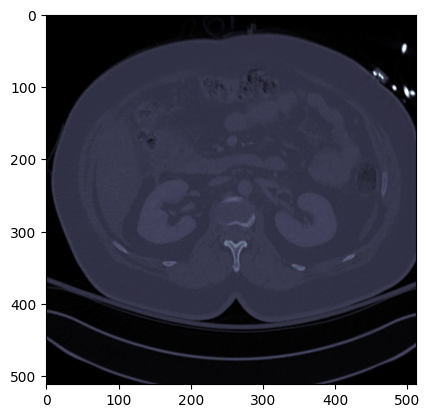

In [14]:
#np.random.seed(1234)
idx = np.random.randint(0,len(train_v2))
columns = train_v2.columns[1:15]
patient_info = train_v2.loc[idx,'png_path'].split('/')
series_id = patient_info[-2]
inst_num = patient_info[-1]
print(f"Patient ID: {train_v2.loc[idx,'patient_id']}, Series ID: {series_id}, \
Instance #: {inst_num}")
#print(f"Series ID: {train_v2.loc[idx,'series_id']}")
#print(f"Instance #: {train_v2.loc[idx,'instance_number']}")
print(f'{train_v2.loc[idx,columns]}')
img_path = train_v2.loc[idx,'png_path']
#img_path = train_v2.loc[(train_v2.patient_id == 61399)&(train_v2.series_id == 35275)&(train_v2.instance == ,'png_path'].tolist()[0]
print(f'\n\n{img_path}')
img = plt.imread(img_path)
print(f'Image sahpe: {img.shape}')
print(f'Image array dtype: {img.dtype}')
print(f'Min & Max: {img.min(),img.max()}')
plt.imshow(img,cmap='bone');

In [ ]:
#@title Poor quality images:
# Patient ID: 46022, Series ID: 22425, Instance #: 368
# Patient ID: 61399, Series ID: 35275, Instance #: 607
# Patient ID: 18779, Series ID: 62696, Instance #: 680
# Patient ID: 55888, Series ID: 13925, Instance #: 498.png





In [15]:
def build_decoder(with_labels=True, target_size=CFG.img_size,ext='png'):
    def decode_image(path):

        file_bytes = tf.io.read_file(path)

        if ext == 'png':
            img = tf.image.decode_png(file_bytes, channels=3, dtype=tf.uint8)
        elif ext in ['jpg', 'jpeg']:
            img = tf.image.decode_jpeg(file_bytes, channels=3, dtype=tf.uint8)
        else:
            raise ValueError("Image extension not supported")

        img = tf.image.resize(img, target_size, method='bilinear')

        img = tf.cast(img, tf.float32) / 255.0


        print(f' images: {img}')

        return img

    def decode_label(label):
        label = tf.cast(label, tf.float32)
        return (label[0:1], label[1:2], label[2:5], label[5:8], label[8:11])

    def decode_with_labels(path, label):

        return decode_image(path), decode_label(label)

    return decode_with_labels if with_labels else decode



def build_dataset(paths, labels=None, batch_size=32, cache=True,
                  decode_fn=None, shuffle=1024, repeat=True,
                  cache_dir="", drop_remainder=False):

    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)


    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)

    ds = tf.data.Dataset.from_tensor_slices(slices)


    ds = ds.map(decode_fn, num_parallel_calls=AUTO)

    ds = ds.cache(cache_dir) if cache else ds

    ds = ds.repeat() if repeat else ds


    if shuffle:
        ds = ds.shuffle(shuffle, seed=CFG.seed)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)


    # Dropout on images
    if labels is not None:
        print('Add dropout to image!')
        ds = ds.map(lambda img, label: (dropout(img,
                                               DIM=CFG.img_size,
                                               PROBABILITY=CFG.drop_prob,
                                               CT=CFG.drop_cnt,
                                               SZ=CFG.drop_size), label),num_parallel_calls=AUTO)

    ds = ds.batch(batch_size, drop_remainder=drop_remainder)


    ds = ds.prefetch(AUTO)


    return ds

In [16]:
def dropout(image,DIM=CFG.img_size, PROBABILITY = 0.6, CT = 5, SZ = 0.1):
    # input image - is one image of size [dim,dim,3] not a batch of [b,dim,dim,3]
    # output - image with CT squares of side size SZ*DIM removed

    # DO DROPOUT WITH PROBABILITY DEFINED ABOVE
    P = tf.cast( tf.random.uniform([],0,1)<PROBABILITY, tf.int32)
    if (P==0)|(CT==0)|(SZ==0):
        return image

    for k in range(CT):
        # CHOOSE RANDOM LOCATION
        x = tf.cast( tf.random.uniform([],0,DIM[1]),tf.int32)
        y = tf.cast( tf.random.uniform([],0,DIM[0]),tf.int32)
        # COMPUTE SQUARE
        WIDTH = tf.cast( SZ*min(DIM),tf.int32) * P
        ya = tf.math.maximum(0,y-WIDTH//2)
        yb = tf.math.minimum(DIM[0],y+WIDTH//2)
        xa = tf.math.maximum(0,x-WIDTH//2)
        xb = tf.math.minimum(DIM[1],x+WIDTH//2)
        # DROPOUT IMAGE
        one = image[ya:yb,0:xa,:]
        two = tf.zeros([yb-ya,xb-xa,3], dtype = image.dtype)
        three = image[ya:yb,xb:DIM[1],:]
        middle = tf.concat([one,two,three],axis=1)
        image = tf.concat([image[0:ya,:,:],middle,image[yb:DIM[0],:,:]],axis=0)
        image = tf.reshape(image,[*DIM,3])

#     image = tf.reshape(image,[*DIM,3])
    return image

In [17]:
def build_model(model_name=CFG.model_name,
                loss_name=CFG.loss,
                dim=CFG.img_size,
                compile_model=True,
                include_top=False):

    # Define backbone
    base = getattr(efficientnet, model_name)(input_shape=(*dim,3),
                                    pretrained='imagenet',
                                    num_classes=0) # get base model (efficientnet), use imgnet weights

    inp = base.inputs
    x = base.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x) # use GAP to get pooling result form conv outputs
    #x = tf.keras.layers.MaxPooling2D()(x) # this throws an error

    # Define 'necks' for each head
    x_bowel = tf.keras.layers.Dense(32, activation='elu')(x)
    x_extra = tf.keras.layers.Dense(32, activation='elu')(x)
    x_liver = tf.keras.layers.Dense(32, activation='elu')(x)
    x_kidney = tf.keras.layers.Dense(32, activation='elu')(x)
    x_spleen = tf.keras.layers.Dense(32, activation='elu')(x)

    # Define heads
    out_bowel = tf.keras.layers.Dense(1, name='bowel', activation='sigmoid')(x_bowel) # use sigmoid to convert predictions to [0-1]
    out_extra = tf.keras.layers.Dense(1, name='extra', activation='sigmoid')(x_extra) # use sigmoid to convert predictions to [0-1]
    out_liver = tf.keras.layers.Dense(3, name='liver', activation='softmax')(x_liver) # use softmax for the liver head
    out_kidney = tf.keras.layers.Dense(3, name='kidney', activation='softmax')(x_kidney) # use softmax for the kidney head
    out_spleen = tf.keras.layers.Dense(3, name='spleen', activation='softmax')(x_spleen) # use softmax for the spleen head

    # Combine outputs
#     out = tf.keras.layers.Concatenate()([out_bowel, out_extra,
#                                          out_liver, out_kidney, out_spleen])
    out = [out_bowel, out_extra, out_liver, out_kidney, out_spleen]

    # Create model
    model = tf.keras.Model(inputs=inp, outputs=out)


    if compile_model:
        # optimizer
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
        # loss
        loss = {
            'bowel':tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
            'extra':tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
            'liver':tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
            'kidney':tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
            'spleen':tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        }
        # metric
        metrics = {
            'bowel':['accuracy'],
            'extra':['accuracy'],
            'liver':['accuracy'],
            'kidney':['accuracy'],
            'spleen':['accuracy'],
        }
        # compile
        model.compile(optimizer=opt,
                      loss=loss,
                      metrics=metrics)
    return model

In [18]:
model = build_model(CFG.model_name, dim=CFG.img_size, compile_model=True)
#model.summary()  # too long

21998664/21998664 [==============================] - 412s 19us/step
>>>> Load pretrained from: /root/.keras/models/efficientnetv1-b0-imagenet.h5


In [ ]:
# load weight for trained model
# model.load_weights('')

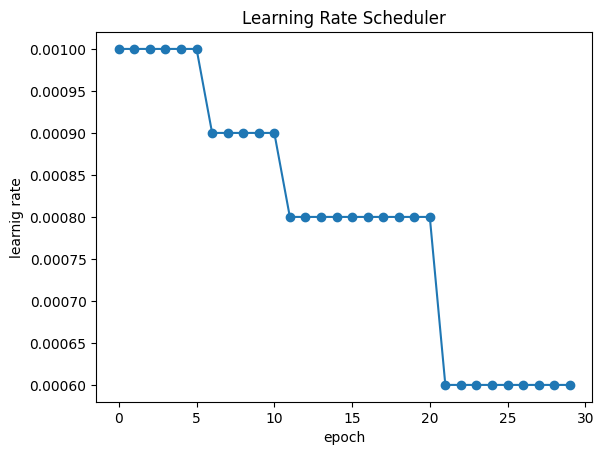

In [19]:
def get_lr_callback(batch_size=8, plot=False):
    lr_start   = 0.001
    lr_max     = 0.0001
    lr_min     = 0.000001
    lr_ramp_ep = 3
    lr_sus_ep  = 0
    lr_decay   = 0.8

    def lrfn(epoch):
        if epoch <= 5:
            lr = lr_start
        elif epoch > 5 and epoch < 11:
            lr = lr_start * 0.9
        elif epoch > 10 and epoch < 21:
            lr = lr_start * 0.8
        else:
            lr = lr_start * 0.6


        #elif epoch < lr_ramp_ep:
        #    lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

        #elif epoch < lr_ramp_ep + lr_sus_ep:
        #    lr = lr_max

        #elif CFG.scheduler=='exp':
        #    lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

        #elif CFG.scheduler=='cosine':
        #    decay_total_epochs = CFG.epochs - lr_ramp_ep - lr_sus_ep + 3
        #    decay_epoch_index = epoch - lr_ramp_ep - lr_sus_ep
        #    phase = math.pi * decay_epoch_index / decay_total_epochs
        #    cosine_decay = 0.4 * (1 + math.cos(phase))
        #    lr = (lr_max - lr_min) * cosine_decay + lr_min

        return lr

    if plot:
        plt.figure()
        plt.plot(np.arange(CFG.epochs), [lrfn(epoch) for epoch in np.arange(CFG.epochs)],marker='o')
        plt.xlabel('epoch')
        plt.ylabel('learnig rate')
        plt.title('Learning Rate Scheduler')


    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=False)
    return lr_callback

_=get_lr_callback(CFG.batch_size, plot=True )

In [20]:
def display_batch(batch, size=2):
    if isinstance(batch, tuple):
        imgs, tars = batch
    else:
        imgs = batch
        tars = None
    tars = tf.concat(tars,axis=-1).numpy()
    plt.figure(figsize=(size*5, 10))
    for img_idx in range(size):
        plt.subplot(1, size, img_idx+1)
        if tars is not None:
            plt.title(f'{tars[img_idx].round(2)}', fontsize=12)
        img = imgs[img_idx,]
        print(f'image type: {img.numpy().min()} & {img.numpy().max()}')
        plt.imshow(img,cmap='bone')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [21]:
df = train_v2.copy()
fold = 0
fold_df = df[df.fold==fold].sample(frac=1.0)
paths  = fold_df.png_path.tolist()
labels = fold_df[CFG.target_col].values
ds = build_dataset(paths, labels, cache=False, batch_size=32,
                   repeat=True, shuffle=True)
ds = ds.unbatch().batch(20)
batch = next(iter(ds))

 images: Tensor("truediv:0", shape=(256, 256, 3), dtype=float32)
Add dropout to image!


image type: 0.0 & 0.8009803891181946
image type: 0.0 & 0.9725490212440491
image type: 0.0 & 0.9960784316062927


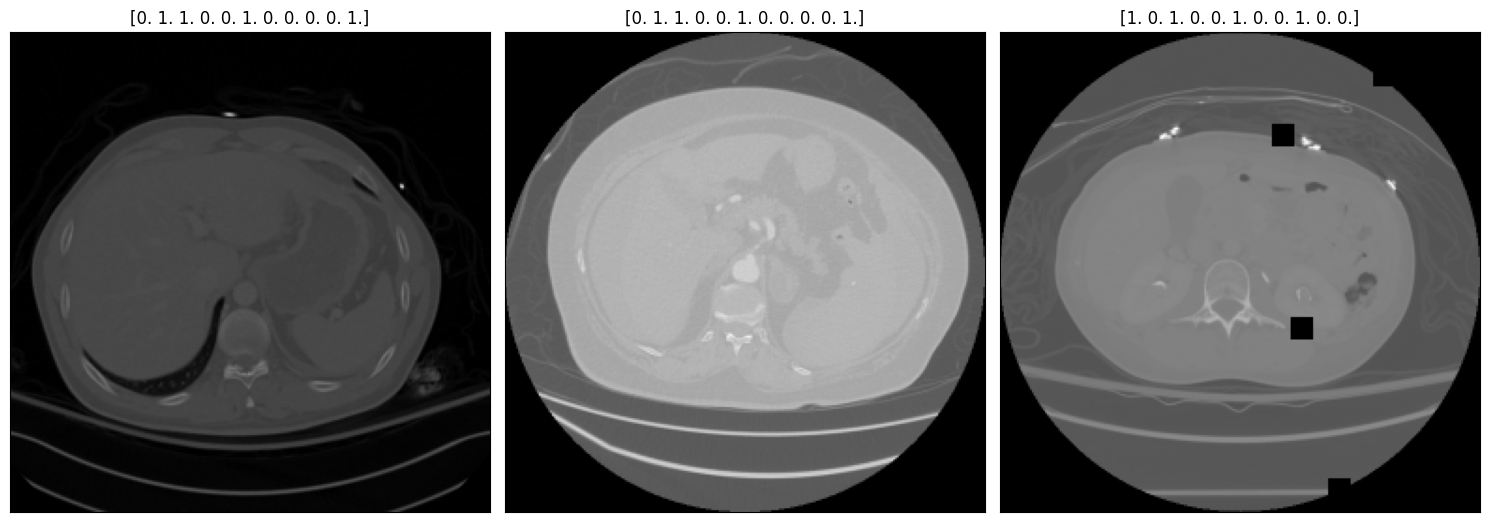

In [22]:
def do_nothing(img):
  return img

#dimgs = tf.map_fn(lambda img: dropout(img,
#                DIM=CFG.img_size,
#                PROBABILITY=1.0,
#                CT=10,
#                SZ=0.08), batch[0])

dimgs = tf.map_fn(lambda img: do_nothing(img),batch[0])
dtars = batch[1]
display_batch((dimgs,dtars), 3)
#display_batch((dimgs, dtars), 3);

(7766, 11)

In [23]:
scores = []

train_folds = CFG.selected_folds

# train and valid dataframe
train_df = train_v2.query("fold in @train_folds")
valid_df = train_v2.query("fold not in @train_folds")

# get image_paths and labels
train_paths = train_df.png_path.values
train_labels = train_df[CFG.target_col].values.astype(np.float32)

valid_paths = valid_df.png_path.values
valid_labels = valid_df[CFG.target_col].values.astype(np.float32)

# shuffle train data
index = np.arange(len(train_df))
np.random.shuffle(index)
train_paths  = train_paths[index]
train_labels = train_labels[index]

fold = 0
# show message
print('#'*40); print('#### FOLD: ',fold)
print('#### IMAGE_SIZE: (%i, %i) | MODEL_NAME: %s | BATCH_SIZE: %i'%
          (CFG.img_size[0],CFG.img_size[1],CFG.model_name,CFG.batch_size))
# data stat
num_train = len(train_paths)
num_valid = len(valid_paths)

print('#### NUM_TRAIN: {:,} | NUM_VALID: {:,}'.format(num_train, num_valid))



########################################
#### FOLD:  0
#### IMAGE_SIZE: (256, 256) | MODEL_NAME: EfficientNetV1B0 | BATCH_SIZE: 36
#### NUM_TRAIN: 8,776 | NUM_VALID: 2,564


In [45]:
#train_df

In [24]:
# build model
K.clear_session()

model = build_model(CFG.model_name, dim=CFG.img_size, compile_model=True)
# build dataset
cache = 1 if 'TPU' in CFG.device else 1
train_ds = build_dataset(train_paths, train_labels,cache=cache, batch_size=CFG.batch_size,
                   repeat=True, shuffle=True)
val_ds = build_dataset(valid_paths, valid_labels, cache=cache, batch_size=CFG.batch_size,
                   repeat=False, shuffle=False)

>>>> Load pretrained from: /root/.keras/models/efficientnetv1-b0-imagenet.h5
 images: Tensor("truediv:0", shape=(256, 256, 3), dtype=float32)
Add dropout to image!
 images: Tensor("truediv:0", shape=(256, 256, 3), dtype=float32)
Add dropout to image!


In [48]:
train_ds.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 (TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)))

In [26]:
# callbacks
callbacks = []
checkpoint_path = "/content/atd/rsna2023_atd_v2.ckpt"
## save best model after each fold
sv = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    verbose=CFG.verbose,
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    save_freq='epoch')

callbacks +=[sv]

## lr-scheduler
callbacks += [get_lr_callback(CFG.batch_size)]

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    start_from_epoch=0,
)

callbacks += [early_stop]


In [27]:
callbacks

In [28]:
# train
print('Training...')
history = model.fit(
        train_ds,
        epochs=CFG.epochs,
        callbacks = callbacks,
        steps_per_epoch=len(train_paths)/CFG.batch_size,
        validation_data=val_ds,
        verbose=CFG.verbose
    )


Training...
Epoch 1/30
244/243 [==============================] - ETA: 0s - loss: 1.1165 - bowel_loss: 0.1876 - extra_loss: 0.1821 - liver_loss: 0.2329 - kidney_loss: 0.2488 - spleen_loss: 0.2651 - bowel_accuracy: 0.9691 - extra_accuracy: 0.9705 - liver_accuracy: 0.9787 - kidney_accuracy: 0.9727 - spleen_accuracy: 0.9624
Epoch 1: val_loss improved from inf to 3.97757, saving model to /content/rsna2023_atd_v2.ckpt
243/243 [==============================] - 833s 3s/step - loss: 1.1165 - bowel_loss: 0.1876 - extra_loss: 0.1821 - liver_loss: 0.2329 - kidney_loss: 0.2488 - spleen_loss: 0.2651 - bowel_accuracy: 0.9691 - extra_accuracy: 0.9705 - liver_accuracy: 0.9787 - kidney_accuracy: 0.9727 - spleen_accuracy: 0.9624 - val_loss: 3.9776 - val_bowel_loss: 0.7114 - val_extra_loss: 0.9488 - val_liver_loss: 0.8845 - val_kidney_loss: 0.4182 - val_spleen_loss: 1.0147 - val_bowel_accuracy: 0.6958 - val_extra_accuracy: 0.6728 - val_liver_accuracy: 0.7882 - val_kidney_accuracy: 0.9228 - val_spleen_ac

In [30]:
# store best results
best_epoch = np.argmin(history.history['val_loss'])
best_loss = history.history['val_loss'][best_epoch]
best_acc_bowel = history.history['val_bowel_accuracy'][best_epoch]
best_acc_extra = history.history['val_extra_accuracy'][best_epoch]
best_acc_liver = history.history['val_liver_accuracy'][best_epoch]
best_acc_kidney = history.history['val_kidney_accuracy'][best_epoch]
best_acc_spleen = history.history['val_spleen_accuracy'][best_epoch]

# Find mean accuracy
best_acc = np.mean([best_acc_bowel, best_acc_extra, best_acc_liver, best_acc_kidney, best_acc_spleen])

print(f'\n{"="*17} FOLD {fold} RESULTS {"="*17}')
print(f'>>>> BEST Loss  : {best_loss:.3f}\n>>>> BEST Acc   : {best_acc:.3f}\n>>>> BEST Epoch : {best_epoch}\n')
print('ORGAN Acc:')
print(f'  >>>> {"Bowel".ljust(15)} : {best_acc_bowel:.3f}')
print(f'  >>>> {"Extravasation".ljust(15)} : {best_acc_extra:.3f}')
print(f'  >>>> {"Liver".ljust(15)} : {best_acc_liver:.3f}')
print(f'  >>>> {"Kidney".ljust(15)} : {best_acc_kidney:.3f}')
print(f'  >>>> {"Spleen".ljust(15)} : {best_acc_spleen:.3f}')

scores.append([best_loss, best_acc,
                   best_acc_bowel, best_acc_extra,
                   best_acc_liver, best_acc_kidney, best_acc_spleen])


================= FOLD 0 RESULTS =================
>>>> BEST Loss  : 3.896
>>>> BEST Acc   : 0.755
>>>> BEST Epoch : 1

ORGAN Acc:
  >>>> Bowel           : 0.723
  >>>> Extravasation   : 0.712
  >>>> Liver           : 0.782
  >>>> Kidney          : 0.883
  >>>> Spleen          : 0.673


NameError: ignored

In [32]:
history.history.keys()

history_df = pd.DataFrame(history.history)

history_df.to_csv('/gdrive/MyDrive/DATA/RSNA2023_ATD/model_history/model_v2.csv')


In [48]:
!ls atd_v2

checkpoint				  rsna2023_atd_v2.ckpt.index
rsna2023_atd_v2.ckpt.data-00000-of-00001


In [45]:
!ls

atd_v2	    rsna2023_atd_v2.ckpt.data-00000-of-00001  sample_data
checkpoint  rsna2023_atd_v2.ckpt.index


In [49]:
!zip -r atd_v2.zip atd_v2

  adding: atd_v2/ (stored 0%)
  adding: atd_v2/checkpoint (deflated 41%)
  adding: atd_v2/rsna2023_atd_v2.ckpt.data-00000-of-00001 (deflated 8%)
  adding: atd_v2/rsna2023_atd_v2.ckpt.index (deflated 77%)


In [ ]:
#==========================================================================

In [ ]:
model_copy = build_model(CFG.model_name, dim=CFG.img_size, compile_model=True)

21998664/21998664 [==============================] - 1s 0us/step
>>>> Load pretrained from: /root/.keras/models/efficientnetv1-b0-imagenet.h5


In [ ]:
model_copy.load_weights('/gdrive/MyDrive/DATA/RSNA2023_ATD/model_check_points/v1/rsna2023_atd_v1.ckpt')

In [ ]:
image_paths = train_v2.loc[0:2,'image_path'].values
arr_list = []
for path in image_paths:
  arr = cv2.imread(image_paths[0])
  arr = np.resize(arr,new_shape=(256,256,3))
  #arr = np.expand_dims(arr,axis=0)
  arr = (arr/arr.max()).astype(float)
  arr_list.append(arr)

In [ ]:
np_list = np.array(arr_list)
np_list.shape

(3, 256, 256, 3)

In [ ]:
pred = model_copy.predict(np_list)

1/1 [==============================] - 2s 2s/step


In [ ]:
pred[4]

array([[0.22431941, 0.16457963, 0.611101  ],
       [0.22431941, 0.16457963, 0.611101  ],
       [0.22431938, 0.16457951, 0.6111011 ]], dtype=float32)